# 공공데이터 과제 #3

### 대구시의 7개 구별 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구) 남녀 비율 및 대구시 전체의 남녀 비율을 각각의 파이 차트로 나타내시오.
 - subplots를 이용하여 4x2 형태의 총 8개의 subplot을 파이 차트로 구현
 - gender.csv 파일 사용

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

In [24]:
df=pd.read_csv('gender.csv',encoding='euc_kr')

# DF에 광역시/군,구 칼럼 추가
city_list=[]
county_list=[]

for i in df['행정구역']:
    city_list.append(i.split(' ')[0])
    county_list.append(i.split(' ')[1])
df['city']=city_list
df['county']=county_list

# 대구광역시를 구별로 그룹화
daegu=df[df['city']=='대구광역시'].groupby('county')

 # 대구 남,녀 총인구
daegu_male=int(daegu.get_group('').reset_index(drop=True).iloc[0,104].replace(',',''))
print(daegu_male)
daegu_female=int(daegu.get_group('').reset_index(drop=True).iloc[0,207].replace(',',''))
print(daegu_female)

# 중구 남 총인구
# daegu.get_group('중구').reset_index(drop=True).iloc[0,104].replace(',','')
# 중구 여 총인구
# daegu.get_group('중구').reset_index(drop=True).iloc[0,207].replace(',','')

dff = pd.DataFrame(daegu)
dff

1169571
1205735


C:\Users\ahasu\AppData\Local\Temp\ipykernel_15060\558774803.py:1: DtypeWarning: Columns (99,100,101,102,103,197,198,199,200,305,306,309) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gender.csv',encoding='euc_kr')


,0,1
0,,행정구역 2022년06월_계_총인구수 2022년...
1,남구,행정구역 2022년06월_계_총인구...
2,달서구,행정구역 2022년06월_계_총...
3,달성군,행정구역 2022년06월_계...
4,동구,행정구역 2022년06월_계_총인...
5,북구,행정구역 2022년06월_계_총인구...
6,서구,행정구역 2022년06월_계_총인...
7,수성구,행정구역 2022년06월_계_...
8,중구,행정구역 2022년06월_계_총인구수...


In [28]:
daegu_county=['중구', '동구', '서구', '남구', '북구', '수성구', '달서구']

# 구별 남녀인구 리스트에 추가 + 전체 남녀인구
male_list=[]
female_list=[]

for i in daegu_county:

    male_list.append(int(daegu.get_group(i).reset_index(drop=True).iloc[0,104].replace(',','')))
    female_list.append(int(daegu.get_group(i).reset_index(drop=True).iloc[0,207].replace(',','')))

daegu_county.append('전체')
male_list.append(daegu_male)
female_list.append(daegu_female)

# 한글 글꼴
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

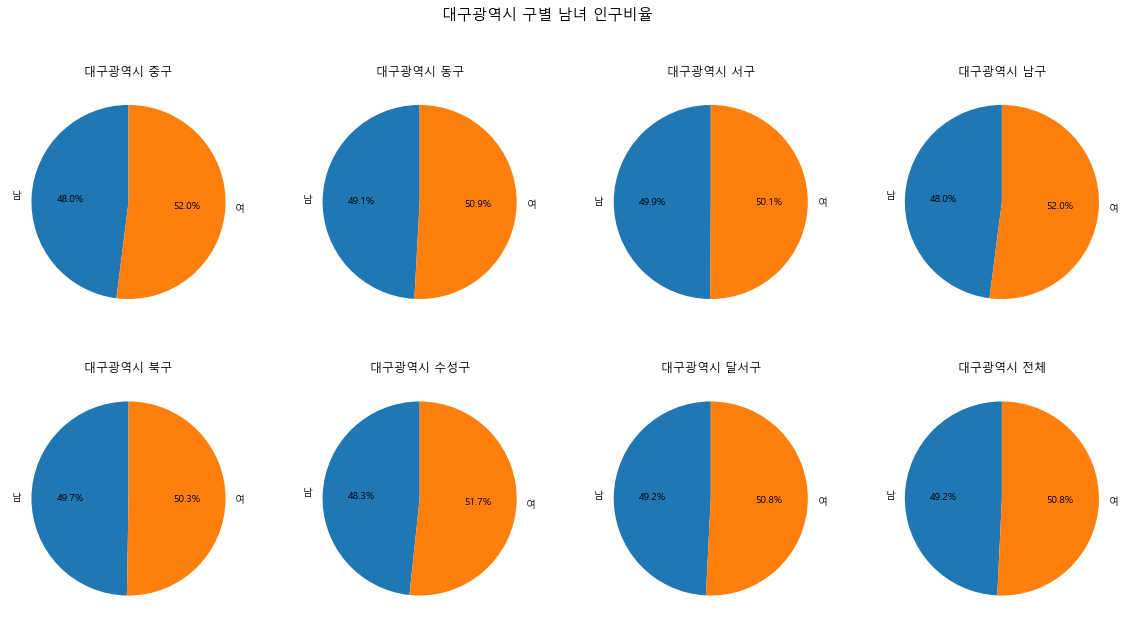

In [29]:
# 그래프 그리기

# 전체 subplot의 개수 설정
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('대구광역시 구별 남녀 인구비율', fontsize=15)

# 남녀 성비 그래프
for i in range(8):    
    plt.subplot(2, 4, i+1)
    plt.pie([male_list[i],female_list[i]],labels=['남', '여'], autopct='%.1f%%', startangle=90)
    plt.title('대구광역시 '+daegu_county[i])

plt.show()